# Objective
## Analyse the customer data from H department store and predict future customers gender based on the given data.

# Table of Content
## 1. Data preparation
### - import library
### - get train.csv and test.csv
## 2. Data Analysis
### - Correlation of gender to other features
### - data visualization
## 3.  feature engineering
## 4. modeling

In [1]:
import pandas as pd
from pandas import Series, DataFrame
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

#importing basic libraries for visualization and data analyzing

In [2]:
#import data sets
train = pd.read_csv('train.csv', engine='python')
test = pd.read_csv('test.csv', engine = 'python')

In [3]:
# observe the data to see if there are any missing values and data types
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 18 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   custid     5000 non-null   int64  
 1   gender     5000 non-null   int64  
 2   총구매액       5000 non-null   int64  
 3   구매건수       5000 non-null   int64  
 4   평균구매가격     5000 non-null   int64  
 5   평균할부개월수    5000 non-null   float64
 6   구매브랜드종류    5000 non-null   int64  
 7   내점일수       5000 non-null   int64  
 8   수입상품_구매비율  5000 non-null   float64
 9   주말방문비율     5000 non-null   float64
 10  가을_구매건수    4055 non-null   float64
 11  겨울_구매건수    4103 non-null   float64
 12  봄_구매건수     4311 non-null   float64
 13  여름_구매건수    3978 non-null   float64
 14  아침_구매건수    3558 non-null   float64
 15  저녁_구매건수    4033 non-null   float64
 16  점심_구매건수    4855 non-null   float64
 17  주구매코너      5000 non-null   object 
dtypes: float64(10), int64(7), object(1)
memory usage: 703.2+ KB


In [4]:
train.head()

,custid,gender,총구매액,구매건수,평균구매가격,평균할부개월수,구매브랜드종류,내점일수,수입상품_구매비율,주말방문비율,가을_구매건수,겨울_구매건수,봄_구매건수,여름_구매건수,아침_구매건수,저녁_구매건수,점심_구매건수,주구매코너
0,18,0,680100,15,45340,1.7,9,10,26.7,100.0,NaN,9.0,6.0,NaN,NaN,6.0,9.0,화장품
1,21,0,353450,9,39272,1.2,6,8,11.1,37.5,NaN,5.0,4.0,NaN,3.0,NaN,6.0,영캐주얼
2,23,0,5671400,36,157539,2.8,22,16,5.6,37.5,7.0,17.0,12.0,NaN,10.0,11.0,15.0,장신구
3,26,0,1964000,28,70143,1.4,15,14,39.3,28.6,5.0,8.0,15.0,NaN,NaN,18.0,10.0,화장품
4,35,0,885000,5,177000,6.0,5,2,0.0,100.0,NaN,NaN,5.0,NaN,NaN,5.0,NaN,피혁A


In [5]:
# 빈갑들이 0 이 돼는 이유는 총 건수의 갑때문에
train = train.fillna(0)
test = test.fillna(0)

In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 18 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   custid     5000 non-null   int64  
 1   gender     5000 non-null   int64  
 2   총구매액       5000 non-null   int64  
 3   구매건수       5000 non-null   int64  
 4   평균구매가격     5000 non-null   int64  
 5   평균할부개월수    5000 non-null   float64
 6   구매브랜드종류    5000 non-null   int64  
 7   내점일수       5000 non-null   int64  
 8   수입상품_구매비율  5000 non-null   float64
 9   주말방문비율     5000 non-null   float64
 10  가을_구매건수    5000 non-null   float64
 11  겨울_구매건수    5000 non-null   float64
 12  봄_구매건수     5000 non-null   float64
 13  여름_구매건수    5000 non-null   float64
 14  아침_구매건수    5000 non-null   float64
 15  저녁_구매건수    5000 non-null   float64
 16  점심_구매건수    5000 non-null   float64
 17  주구매코너      5000 non-null   object 
dtypes: float64(10), int64(7), object(1)
memory usage: 703.2+ KB


In [7]:
#Drop ID column in train and test
train_ID = train['custid']
test_id = test['custid']

train.drop('custid', axis=1, inplace=True)
test.drop('custid', axis=1, inplace=True)

In [8]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   gender     5000 non-null   int64  
 1   총구매액       5000 non-null   int64  
 2   구매건수       5000 non-null   int64  
 3   평균구매가격     5000 non-null   int64  
 4   평균할부개월수    5000 non-null   float64
 5   구매브랜드종류    5000 non-null   int64  
 6   내점일수       5000 non-null   int64  
 7   수입상품_구매비율  5000 non-null   float64
 8   주말방문비율     5000 non-null   float64
 9   가을_구매건수    5000 non-null   float64
 10  겨울_구매건수    5000 non-null   float64
 11  봄_구매건수     5000 non-null   float64
 12  여름_구매건수    5000 non-null   float64
 13  아침_구매건수    5000 non-null   float64
 14  저녁_구매건수    5000 non-null   float64
 15  점심_구매건수    5000 non-null   float64
 16  주구매코너      5000 non-null   object 
dtypes: float64(10), int64(6), object(1)
memory usage: 664.2+ KB


In [9]:
# 한글로 하면 계속 에러날거같으니까
# 그냥 죄다 영어로 바꾸자
# 나중에 어렵게하고싶지 않아.

train=train.rename(columns={'총구매액':'tot_price', '구매건수':'count', 
                         '평균구매가격':'avg_price', '평균할부개월수':'avg_install',
                         '구매브랜드종류':'brand_category', '내점일수':'visited', 
                         '수입상품_구매비율':'income_rate', '주말방문비율':'week_visited',
                         '가을_구매건수':'fall_count', '겨울_구매건수':'wint_count',
                         '봄_구매건수':'spring_count', '여름_구매건수':'summer_count',
                         '아침_구매건수':'morning_count', '저녁_구매건수':'night_count',
                         '점심_구매건수':'after_count', '주구매코너':'major'})
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   gender          5000 non-null   int64  
 1   tot_price       5000 non-null   int64  
 2   count           5000 non-null   int64  
 3   avg_price       5000 non-null   int64  
 4   avg_install     5000 non-null   float64
 5   brand_category  5000 non-null   int64  
 6   visited         5000 non-null   int64  
 7   income_rate     5000 non-null   float64
 8   week_visited    5000 non-null   float64
 9   fall_count      5000 non-null   float64
 10  wint_count      5000 non-null   float64
 11  spring_count    5000 non-null   float64
 12  summer_count    5000 non-null   float64
 13  morning_count   5000 non-null   float64
 14  night_count     5000 non-null   float64
 15  after_count     5000 non-null   float64
 16  major           5000 non-null   object 
dtypes: float64(10), int64(6), object(

In [10]:
# 수치형으로 입력할경우 순위가 생기기떄문에 안됨
# 그래서 one-hot 인코딩으로 



train['major'].value_counts()

일반식품        1306
화장품         1206
유니캐주얼        410
유아동복         383
스포츠          301
영캐주얼         246
캐릭터캐주얼       188
수입명품         136
섬유            96
니트단품          91
트래디셔널캐주얼      91
정장셔츠          90
엘레강스캐주얼       78
피혁A           75
장신구           68
피혁B           56
디자이너부띠끄       51
문화완구          38
조리욕실          28
가전            18
기타바이어         12
도자기크리스탈       11
침구수예           8
가구             7
타운모피           6
Name: major, dtype: int64

In [11]:
# major를 숫자화 한다
train['major'] = train['major'].astype('category')
train['major'] = train['major'].cat.codes
train['major'].value_counts()

14    1306
24    1206
12     410
13     383
9      301
11     246
19     188
8      136
7       96
21      91
3       91
16      90
10      78
22      75
15      68
23      56
5       51
6       38
17      28
1       18
2       12
4       11
18       8
0        7
20       6
Name: major, dtype: int64

In [12]:
df_corr = train.corr()
df_corr

,gender,tot_price,count,avg_price,avg_install,brand_category,visited,income_rate,week_visited,fall_count,wint_count,spring_count,summer_count,morning_count,night_count,after_count,major
gender,1.000000,0.099137,0.094022,0.072181,-0.020066,0.083988,0.084255,-0.021294,0.020457,0.088600,0.065261,0.076116,0.101900,0.127779,-0.021618,0.097237,-0.039270
tot_price,0.099137,1.000000,0.712183,0.376395,0.137335,0.714774,0.617210,-0.048053,-0.048515,0.657523,0.620446,0.635757,0.619743,0.456158,0.398494,0.709572,-0.141735
count,0.094022,0.712183,1.000000,-0.057376,-0.037878,0.869075,0.942115,-0.210022,-0.096558,0.896969,0.879652,0.895580,0.883784,0.672721,0.643764,0.945027,-0.143826
avg_price,0.072181,0.376395,-0.057376,1.000000,0.407556,0.002931,-0.091136,0.189608,0.036426,-0.036019,-0.052918,-0.048857,-0.064851,-0.040362,-0.092749,-0.028726,-0.044333
avg_install,-0.020066,0.137335,-0.037878,0.407556,1.000000,-0.002074,-0.076343,0.097727,-0.001625,-0.018789,-0.039526,-0.033855,-0.041831,-0.047450,-0.051170,-0.014389,-0.021258
brand_category,0.083988,0.714774,0.869075,0.002931,-0.002074,1.000000,0.780303,-0.234547,-0.080674,0.777740,0.774681,0.784562,0.755035,0.582657,0.578552,0.813712,-0.166345
visited,0.084255,0.617210,0.942115,-0.091136,-0.076343,0.780303,1.000000,-0.225363,-0.114795,0.843133,0.836375,0.843763,0.827751,0.638138,0.634809,0.875888,-0.136688
income_rate,-0.021294,-0.048053,-0.210022,0.189608,0.097727,-0.234547,-0.225363,1.000000,0.016123,-0.183411,-0.185994,-0.193382,-0.184013,-0.133133,-0.170649,-0.186310,0.277087
week_visited,0.020457,-0.048515,-0.096558,0.036426,-0.001625,-0.080674,-0.114795,0.016123,1.000000,-0.084014,-0.071125,-0.093424,-0.092989,-0.113193,-0.006852,-0.094814,0.064942
fall_count,0.088600,0.657523,0.896969,-0.036019,-0.018789,0.777740,0.843133,-0.183411,-0.084014,1.000000,0.729604,0.732474,0.735223,0.607713,0.572024,0.848190,-0.119888


In [13]:
pd.DataFrame(abs(train.corr()['gender']).sort_values(ascending = False))

,gender
gender,1.000000
morning_count,0.127779
summer_count,0.101900
tot_price,0.099137
after_count,0.097237
count,0.094022
fall_count,0.088600
visited,0.084255
brand_category,0.083988
spring_count,0.076116


In [14]:
## get the most important variables. 
corr = train.corr()**2
corr.gender.sort_values(ascending=False)

gender            1.000000
morning_count     0.016327
summer_count      0.010384
tot_price         0.009828
after_count       0.009455
count             0.008840
fall_count        0.007850
visited           0.007099
brand_category    0.007054
spring_count      0.005794
avg_price         0.005210
wint_count        0.004259
major             0.001542
night_count       0.000467
income_rate       0.000453
week_visited      0.000418
avg_install       0.000403
Name: gender, dtype: float64

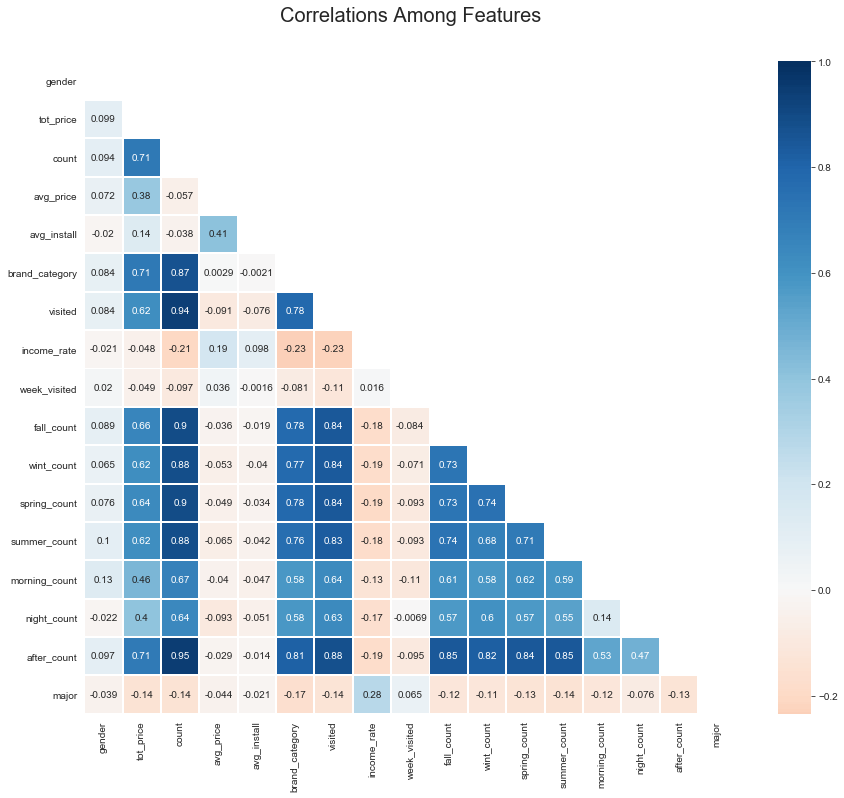

In [15]:
## heatmeap to see the correlation between features. 
# Generate a mask for the upper triangle (taken from seaborn example gallery)
import numpy as np
mask = np.zeros_like(train.corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
sns.set_style('whitegrid')
plt.subplots(figsize = (15,12))
sns.heatmap(train.corr(), 
            annot=True,
            mask = mask,
            cmap = 'RdBu', ## in order to reverse the bar replace "RdBu" with "RdBu_r"
            linewidths=.9, 
            linecolor='white',
            fmt='.2g',
            center = 0,
            square=True)
plt.title("Correlations Among Features", y = 1.03,fontsize = 20, pad = 40);

## feature engineering

In [16]:
#feature engineering
# introduce new feature
train['tot_exported_goods'] = np.where((train['income_rate']!=0),
                                (train['income_rate']* train['tot_price']) / 100, 0)

In [17]:
# 건수 Feature들을 최소단위 정보인 구매건당 구매액로 변경
def createFeatures(df_p):
    df_p['morning_price'] = np.round(df_p['tot_price']*(df_p['morning_count'] /df_p['count'] ), 3)
    df_p['after_price'] = np.round(df_p['tot_price']*(df_p['after_count'] /df_p['count'] ), 3)
    df_p['night_price'] = np.round(df_p['tot_price']*(df_p['night_count'] /df_p['count'] ), 3)  
    df_p['spring_price']   = np.round(df_p['tot_price']*(df_p['spring_count'] /df_p['count'] ), 3) 
    df_p['summer_price'] = np.round(df_p['tot_price']*(df_p['summer_count'] /df_p['count'] ), 3) 
    df_p['fall_price'] = np.round(df_p['tot_price']*(df_p['fall_count'] /df_p['count'] ), 3)  
    df_p['wint_price'] = np.round(df_p['tot_price']*(df_p['wint_count'] /df_p['count'] ), 3)  
    df_p['visited_price'] = np.round(df_p['count'] /df_p['visited'], 3)

def dropFeatures(df_p):
    drop_cols = ['morning_count', 'after_count', 'night_count',
         'spring_count', 'summer_count', 'fall_count', 'wint_count'] 
    
    return df_p.drop(drop_cols, axis=1)

createFeatures(train)
dataPP = dropFeatures(train) 
dataPP[(dataPP['major']==2)].head()

,gender,tot_price,count,avg_price,avg_install,brand_category,visited,income_rate,week_visited,major,tot_exported_goods,morning_price,after_price,night_price,spring_price,summer_price,fall_price,wint_price,visited_price
39,0,454800,5,90960,3.0,4,4,20.0,25.0,2,90960.00,0.000,90960.000,363840.000,454800.000,0.000,0.000,0.000,1.250
478,0,4712934,19,248049,2.3,10,12,10.5,33.3,2,494858.07,992196.632,3224639.053,496098.316,744147.474,992196.632,1736344.105,1240245.789,1.583
1126,1,1497200,12,124767,3.8,8,8,25.0,62.5,2,374300.00,124766.667,499066.667,873366.667,249533.333,499066.667,748600.000,0.000,1.500
1265,0,951000,12,79250,1.7,10,3,0.0,33.3,2,0.00,554750.000,396250.000,0.000,158500.000,0.000,792500.000,0.000,4.000
1612,0,253000,8,31625,1.0,6,7,12.5,14.3,2,31625.00,63250.000,189750.000,0.000,94875.000,158125.000,0.000,0.000,1.143


In [18]:
dataPP

,gender,tot_price,count,avg_price,avg_install,brand_category,visited,income_rate,week_visited,major,tot_exported_goods,morning_price,after_price,night_price,spring_price,summer_price,fall_price,wint_price,visited_price
0,0,680100,15,45340,1.7,9,10,26.7,100.0,24,181586.700,0.000,408060.000,272040.000,272040.000,0.000,0.000,408060.000,1.500
1,0,353450,9,39272,1.2,6,8,11.1,37.5,11,39232.950,117816.667,235633.333,0.000,157088.889,0.000,0.000,196361.111,1.125
2,0,5671400,36,157539,2.8,22,16,5.6,37.5,15,317598.400,1575388.889,2363083.333,1732927.778,1890466.667,0.000,1102772.222,2678161.111,2.250
3,0,1964000,28,70143,1.4,15,14,39.3,28.6,24,771852.000,0.000,701428.571,1262571.429,1052142.857,0.000,350714.286,561142.857,2.000
4,0,885000,5,177000,6.0,5,2,0.0,100.0,22,0.000,0.000,0.000,885000.000,885000.000,0.000,0.000,0.000,2.500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,1,6666517,93,71683,1.8,27,39,10.8,43.6,14,719983.836,573463.828,3154051.054,2939002.118,1003561.699,2365538.290,931878.720,2365538.290,2.385
4996,0,3112100,17,183065,3.6,10,13,29.4,38.5,5,914957.400,549194.118,2562905.882,0.000,1098388.235,183064.706,732258.824,1098388.235,1.308
4997,1,5852482,37,158175,2.6,14,21,40.5,19.0,24,2370255.210,2530803.027,3321678.973,0.000,949051.135,2056277.459,1898102.270,949051.135,1.762
4998,1,654498,13,50346,2.5,10,7,7.7,14.3,22,50396.346,0.000,553806.000,100692.000,100692.000,50346.000,302076.000,201384.000,1.857


In [19]:
## get the most important variables. 
corr = dataPP.corr()**2
corr.gender.sort_values(ascending=False)

gender                1.000000
morning_price         0.014550
summer_price          0.010433
tot_price             0.009828
fall_price            0.009134
after_price           0.008952
count                 0.008840
visited               0.007099
brand_category        0.007054
spring_price          0.006574
wint_price            0.005555
avg_price             0.005210
tot_exported_goods    0.004293
visited_price         0.002412
major                 0.001542
income_rate           0.000453
week_visited          0.000418
avg_install           0.000403
night_price           0.000226
Name: gender, dtype: float64

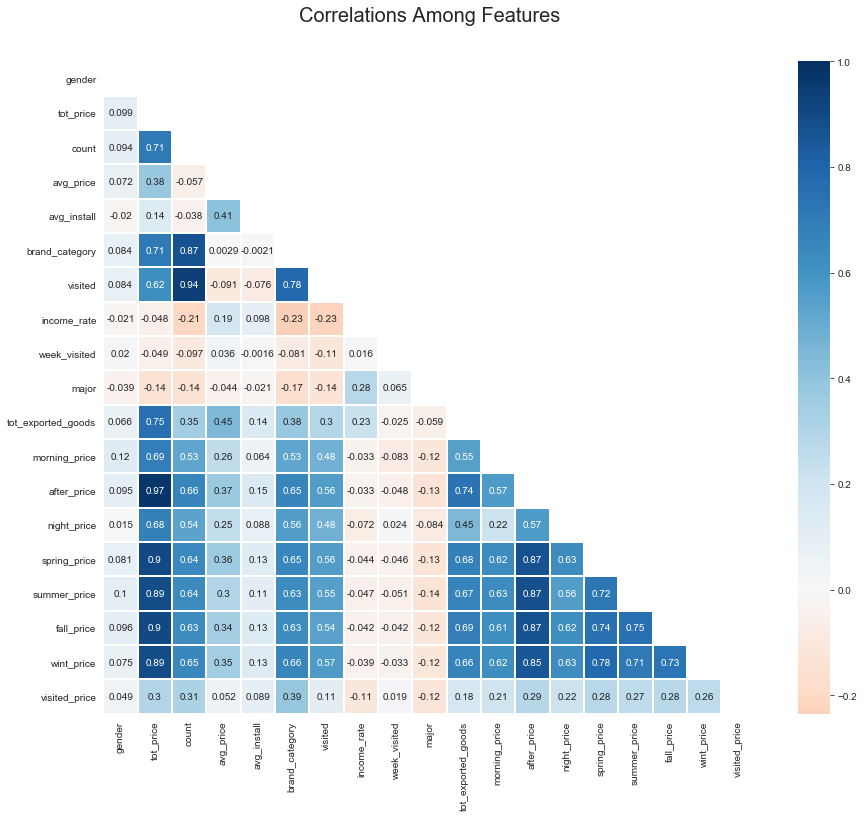

In [20]:
## heatmeap to see the correlation between features. 
# Generate a mask for the upper triangle (taken from seaborn example gallery)
import numpy as np
mask = np.zeros_like(dataPP.corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
sns.set_style('whitegrid')
plt.subplots(figsize = (15,12))
sns.heatmap(dataPP.corr(), 
            annot=True,
            mask = mask,
            cmap = 'RdBu', ## in order to reverse the bar replace "RdBu" with "RdBu_r"
            linewidths=.9, 
            linecolor='white',
            fmt='.2g',
            center = 0,
            square=True)
plt.title("Correlations Among Features", y = 1.03,fontsize = 20, pad = 40);

In [21]:
# Pre-Modeling Tasks
# separating our independent and dependent variable
X = dataPP.drop(['gender', 'avg_install','income_rate'], axis = 1)
y = dataPP["gender"]

In [22]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size = .25, random_state=0)

In [23]:
X_train.head()

,tot_price,count,avg_price,brand_category,visited,week_visited,major,tot_exported_goods,morning_price,after_price,night_price,spring_price,summer_price,fall_price,wint_price,visited_price
4154,404285,3,134762,3,2,0.0,22,134626.905,134761.667,269523.333,0.00,269523.333,0.000,0.000,134761.667,1.500
4820,6169420,38,162353,29,26,34.6,10,814363.440,2110591.053,4058828.947,0.00,1136472.105,1623531.579,1298825.263,2110591.053,1.462
1202,2407157,32,75224,22,17,52.9,14,226272.758,225670.969,1579696.781,601789.25,451341.938,1504473.125,225670.969,225670.969,1.882
3759,4664283,78,59798,24,22,45.5,14,60635.679,0.000,3288917.500,1375365.50,1734156.500,1195970.000,1016574.500,717582.000,3.545
622,3299200,11,299927,9,3,33.3,16,1501136.000,0.000,3299200.000,0.00,3299200.000,0.000,0.000,0.000,3.667


In [24]:
# Feature Scaling
## We will be using standardscaler to transform
from sklearn.preprocessing import StandardScaler
st_scale = StandardScaler()

## transforming "train_x"
X_train = st_scale.fit_transform(X_train)
## transforming "test_x"
X_test = st_scale.transform(X_test)

## transforming "The testset"
#test = st_scale.transform(test)

In [25]:
pd.DataFrame(X_train).head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,-0.578107,-0.771554,0.383621,-0.978272,-0.812209,-1.581346,1.082966,-0.300184,-0.356772,-0.509112,-0.586935,-0.428338,-0.561879,-0.578002,-0.508178,-0.539809
1,0.556113,0.084503,0.723516,0.799012,0.399160,-0.162217,-0.939925,0.197608,1.186140,0.555603,-0.586935,0.170586,0.494607,0.358706,1.028193,-0.601376
2,-0.184066,-0.062249,-0.349831,0.320513,-0.055104,0.588363,-0.265628,-0.233069,-0.285782,-0.140981,-0.059490,-0.302730,0.417131,-0.415249,-0.437488,0.079097
3,0.259996,1.062854,-0.539864,0.457227,0.197265,0.284850,-0.265628,-0.354370,-0.462007,0.339274,0.618519,0.583491,0.216378,0.155148,-0.054987,2.773445
4,-0.008568,-0.575884,2.418298,-0.568129,-0.761736,-0.215537,0.071520,0.700553,-0.462007,0.342163,-0.586935,1.664688,-0.561879,-0.578002,-0.612966,2.971106


In [26]:
len(X_train)

3750

In [27]:
len(X_test)

1250

## modeling

In [ ]:
# import LogisticRegression model in python. 
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_absolute_error, accuracy_score
## call on the model object
logreg = LogisticRegression(solver='liblinear',
                            penalty= 'l1',random_state = 42
                                
                            )


## fit the model with "train_x" and "train_y"
logreg.fit(X_train,y_train)

## Once the model is trained we want to find out how well the model is performing, so we test the model. 
## we use "X_test" portion of the data(this data was not used to fit the model) to predict model outcome. 
y_pred = logreg.predict(X_test)

## Once predicted we save that outcome in "y_pred" variable.
## Then we compare the predicted value( "y_pred") and actual value("test_y") to see how well our model is performing.

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
# printing confision matrix`
pd.DataFrame(confusion_matrix(y_test,y_pred),\
            columns=["Predicted female gender", "Predicted male gender"],\
            index=["female","male"] )

In [34]:
# using cross validation
sc = st_scale

In [36]:
from sklearn.linear_model import LogisticRegression
## Using StratifiedShuffleSplit
## We can use KFold, StratifiedShuffleSplit, StratiriedKFold or ShuffleSplit, They are all close cousins. look at sklearn userguide for more info.   
from sklearn.model_selection import StratifiedShuffleSplit, cross_val_score
cv = StratifiedShuffleSplit(n_splits = 10, test_size = .25, random_state = 0 ) # run model 10x with 60/30 split intentionally leaving out 10%
## Using standard scale for the whole dataset.
from sklearn.model_selection import ShuffleSplit

sscv = ShuffleSplit(test_size=.5, train_size=.5, n_splits=10)
scores = cross_val_score(LogisticRegression(), X_train, y_train, cv=sscv)
scores.mean()

0.6917333333333334

In [ ]:
#Gradient Boosting
# Gradient Boosting Classifier
from sklearn.ensemble import GradientBoostingClassifier

gradient_boost = GradientBoostingClassifier()
gradient_boost.fit(X, y)
y_pred = gradient_boost.predict(X_test)
gradient_accy = round(accuracy_score(y_pred, y_test), 3)
print(gradient_accy)

In [37]:
from sklearn.metrics import mean_absolute_error, accuracy_score
#Gaussian Process Classifier
from sklearn.gaussian_process import GaussianProcessClassifier
GaussianProcessClassifier = GaussianProcessClassifier()
GaussianProcessClassifier.fit(X, y)
y_pred = GaussianProcessClassifier.predict(X_test)
gau_pro_accy = round(accuracy_score(y_pred, y_test), 3)
print(gau_pro_accy)

0.706


In [ ]:
#XGBClassifier
from xgboost import XGBClassifier
XGBClassifier = XGBClassifier()
XGBClassifier.fit(X, y)
y_pred = XGBClassifier.predict(X_test)
XGBClassifier_accy = round(accuracy_score(y_pred, y_test), 3)
print(XGBClassifier_accy)

In [ ]:
dataPP.gender.value_counts()

In [ ]:
#남성의 데이터가 적어서 재현율이 현격히 낮은 현상이 나타남

In [ ]:
import warnings
from sklearn.metrics import roc_curve
from sklearn.impute import SimpleImputer
from sklearn.model_selection import cross_val_score, StratifiedShuffleSplit
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import f1_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from imblearn.under_sampling import *
from sklearn.decomposition import PCA
from imblearn.combine import SMOTETomek
from lightgbm import LGBMClassifier
from sklearn.preprocessing import PolynomialFeatures
# Tomek links :  언더샘플링(Under-Sampling) : 다수 클래스 데이터에서 일부만 사용함
# input : X_train, y_train
#  X_train : 
#  y_train
# output : print
XX, yy = TomekLinks().fit_sample(X_train, y_train)
tree0 = GradientBoostingClassifier()
tree0.fit(XX, yy)
y_pred0 = tree0.predict(X_test)
print(classification_report(y_test, y_pred0))

In [ ]:
# Smot+Tomek links :  복합샘플링(Combining Over-and Under-Sampling) 
# input : X_train, y_train
#  X_train : 
#  y_train
# output : print
XX, yy = SMOTETomek(random_state=0).fit_sample(X_train, y_train)
tree3 = GradientBoostingClassifier()
tree3.fit(XX, yy)
y_pred3 = tree3.predict(X_test)
print(classification_report(y_test, y_pred3))

In [ ]:
dataPP.gender.value_counts()

In [ ]:
from imblearn.combine import *
from sklearn.metrics import roc_curve, classification_report
XX, yy = SMOTEENN(random_state=0).fit_sample(X_train, y_train)

tree3 = GradientBoostingClassifier()
tree3.fit(XX, yy)
y_pred3 = tree3.predict(X_test)
print(classification_report(y_test, y_pred3))


In [38]:
from imblearn.combine import *
from sklearn.metrics import roc_curve, classification_report
from imblearn.ensemble import RUSBoostClassifier
clf = RUSBoostClassifier(random_state=0)
clf.fit(X, y)
y_pred4 = clf.predict(X)  # doctest: +ELLIPSIS

In [39]:
print(classification_report(y, y_pred4))

              precision    recall  f1-score   support

           0       0.78      0.65      0.71      3479
           1       0.42      0.58      0.49      1521

    accuracy                           0.63      5000
   macro avg       0.60      0.61      0.60      5000
weighted avg       0.67      0.63      0.64      5000

